In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### Download and unzip data

In [19]:
!mv /kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d prosperchuks/health-dataset --force


mv: cannot stat '/kaggle.json': No such file or directory
  0% 0.00/1.00M [00:00<?, ?B/s]
100% 1.00M/1.00M [00:00<00:00, 118MB/s]


In [20]:
import zipfile
zip_ref = zipfile.ZipFile("/content/health-dataset.zip")
zip_ref.extractall()
zip_ref.close()

### Data info

In [23]:
df = pd.read_csv("/content/diabetes_data.csv")
print(f"Dataset shape: {df.shape}")

Dataset shape: (70692, 18)


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

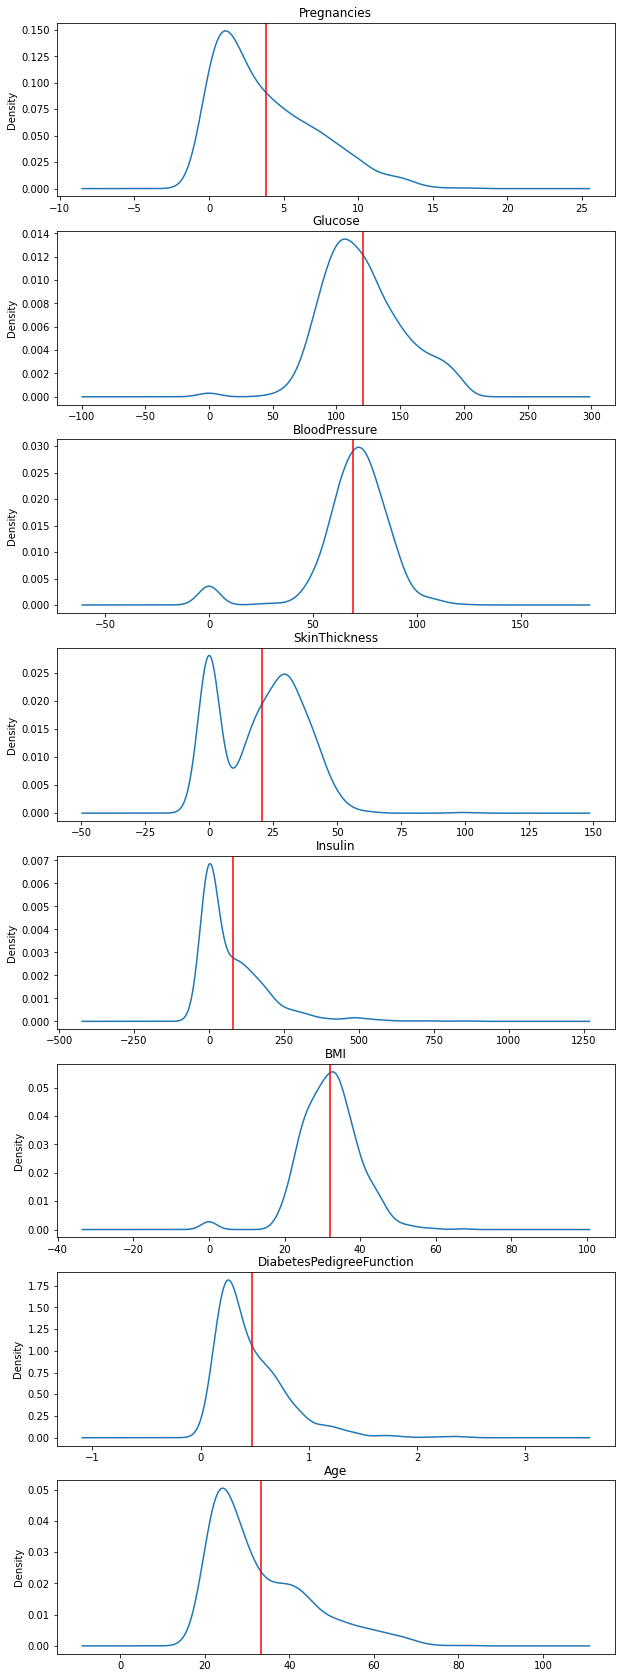

In [ ]:
## Distribution of data
fig, ax = plt.subplots(8,1,figsize=(10,30))
i = 0
for col in df.drop('Outcome', axis=1):
  df[col].plot(kind="kde", ax=ax[i])
  # print(f"{df[col].mean()}")
  ax[i].axvline(df[col].mean(), color="red")
  ax[i].set_title(f"{col}")
  i+=1

### Models:
1. LinearSVC
2. KNeighbours
3. SVC
4. SGD classifier
5. DeepLearning

## 1. LinearSVC

### LinearSVC with StandardScaler with train and test data separately

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
X = df.drop("Outcome", axis=1)
y = df.Outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
X_train 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
383,1,90,62,18,59,25.1,1.268,25
400,4,95,64,0,0,32.0,0.161,31
332,1,180,0,0,0,43.3,0.282,41
516,9,145,88,34,165,30.3,0.771,53
616,6,117,96,0,0,28.7,0.157,30
...,...,...,...,...,...,...,...,...
717,10,94,72,18,0,23.1,0.595,56
711,5,126,78,27,22,29.6,0.439,40
72,13,126,90,0,0,43.4,0.583,42
17,7,107,74,0,0,29.6,0.254,31


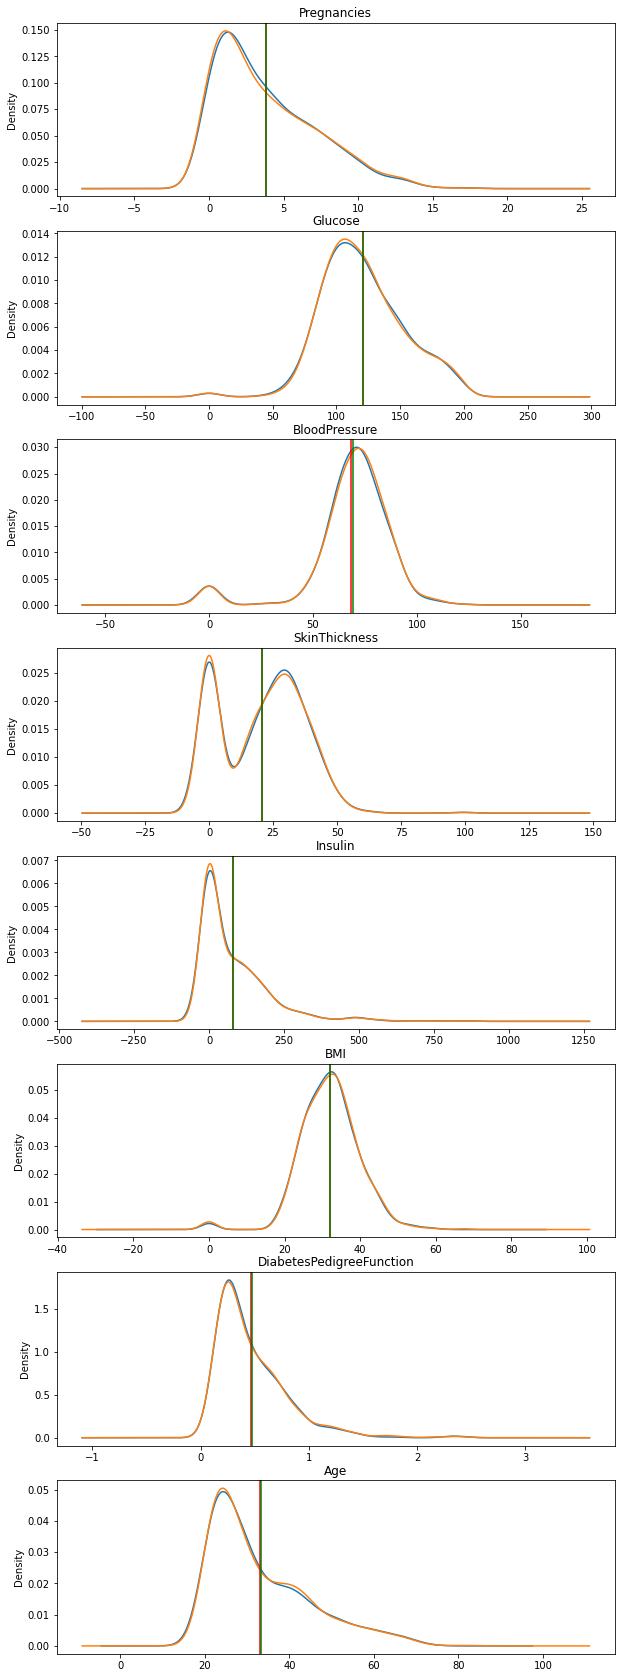

In [ ]:
## Distribution of data for train data
fig, ax = plt.subplots(8,1,figsize=(10,30))
i = 0
for col in X_train:
  X_train[col].plot(kind="kde", ax=ax[i])
  df[col].plot(kind="kde", ax=ax[i])
  ax[i].axvline(X_train[col].mean(), color="red")
  ax[i].axvline(df[col].mean(), color="green")
  ax[i].set_title(f"{col}")
  i+=1

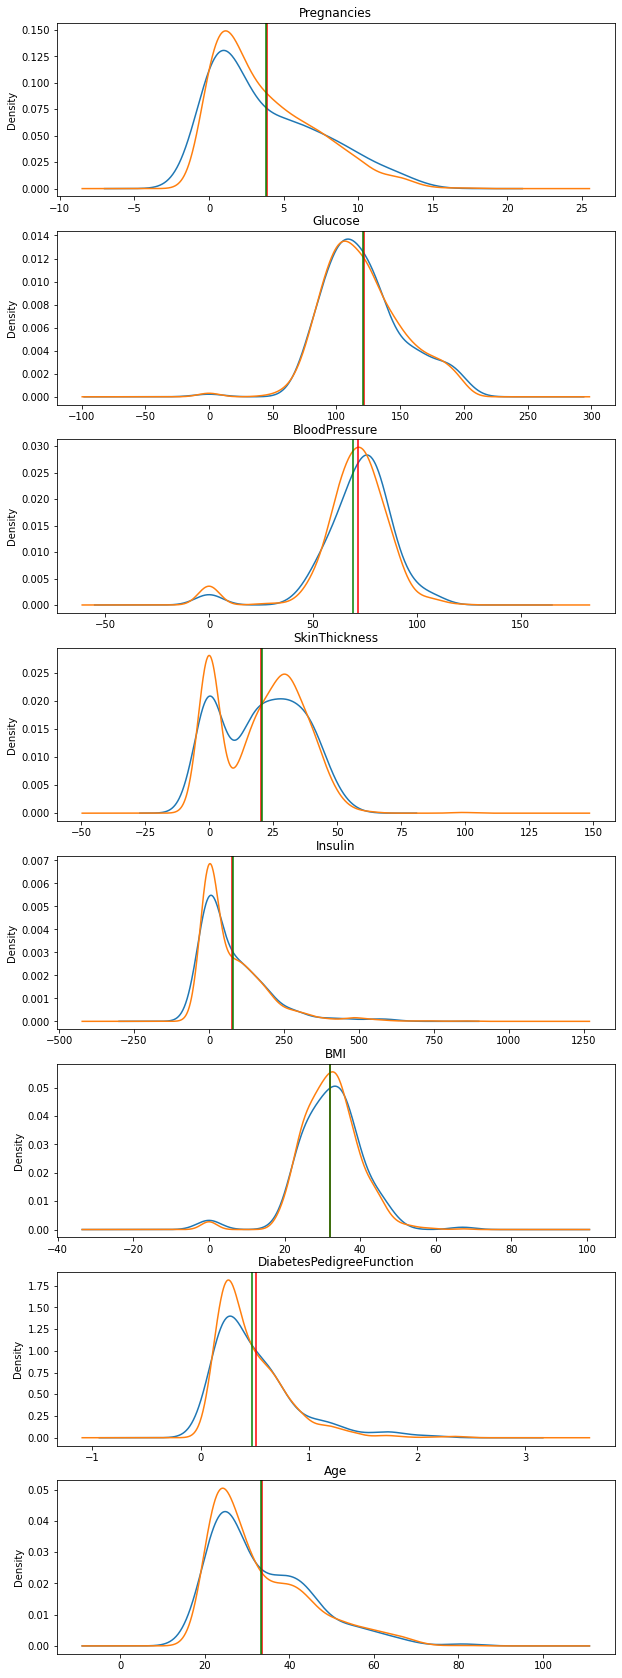

In [ ]:
## Distribution of data for test data
fig, ax = plt.subplots(8,1,figsize=(10,30))
i = 0
for col in X_test:
  X_test[col].plot(kind="kde", ax=ax[i])
  df[col].plot(kind="kde", ax=ax[i])
  ax[i].axvline(X_test[col].mean(), color="red")
  ax[i].axvline(df[col].mean(), color="green")
  ax[i].set_title(f"{col}")
  i+=1

Split data have simular characterictic of all the data, so learning model from it will generilize parameters

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


scaler = StandardScaler()
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

clf = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=42, tol=1e-5))

clf.fit(X_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=42, tol=1e-05))])

In [ ]:
from sklearn.metrics import plot_confusion_matrix
## Predicted labels
pred_linearsvc_labels = clf.predict(X_test_scaled)

data = {"True value": y_test, "Predicted_value": pred_linearsvc_labels}
linear_preds_table = pd.DataFrame(data=data)
linear_preds_table

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,True value,Predicted_value
350,0,0
37,1,0
143,1,0
481,0,0
613,0,0
...,...,...
748,1,0
449,0,0
477,0,0
518,0,0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


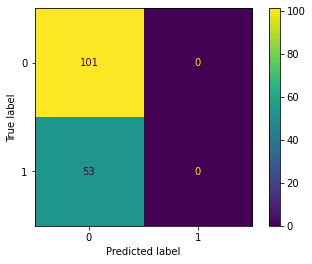

In [ ]:
plot_confusion_matrix(clf, X_test_scaled, y_test)

In [ ]:
## Predicted accuracy
clf_svc_classic = clf.score(X_test_scaled, y_test) 
clf_svc_classic 

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0.6558441558441559

#### **Model dont distinguish between label 0 and 1, we have only false positives.**

### LinearSVC with MinMaxScaler() before split

In [ ]:
### Scaling value beforehand with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

x = X.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf_1 = LinearSVC(random_state=42, tol=1e-5)
clf_1.fit(X_train, y_train)

LinearSVC(random_state=42, tol=1e-05)

In [ ]:
## Predicted labels
pred_linearsvc_labels_1 = clf_1.predict(X_test)

data = {"True value": y_test, "Predicted_value": pred_linearsvc_labels_1}
linear_preds_table = pd.DataFrame(data=data)
linear_preds_table

,True value,Predicted_value
10,0,0
112,0,0
0,1,1
62,0,0
505,0,0
...,...,...
145,0,0
84,1,1
428,0,0
136,0,0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


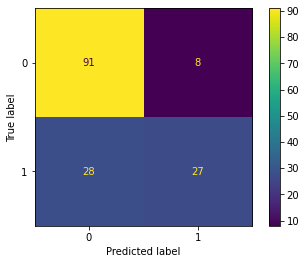

In [ ]:
plot_confusion_matrix(clf_1, X_test, y_test)

In [ ]:
## Predicted accuracy
clf_svc_classic_2 = clf_1.score(X_test, y_test)  
clf_svc_classic_2

0.7987012987012987

#### **Model with MinMaxScaler() beforhand have higher accurancy and start to distinguish between labels**



### LinearSVC with StandarnScaler() before split

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(X)

X = pd.DataFrame(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf_2 = LinearSVC(random_state=42, tol=1e-5)

clf_2.fit(X_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42, tol=1e-05)

In [ ]:
## Predicted labels
pred_linearsvc_labels_2 = clf_2.predict(X_test)

data = {"True value": y_test, "Predicted_value": pred_linearsvc_labels_2}
linear_preds_table = pd.DataFrame(data=data)
linear_preds_table

,True value,Predicted_value
513,0,0
756,0,0
342,0,0
689,1,1
430,0,0
...,...,...
538,0,0
291,1,0
728,0,0
506,1,1


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


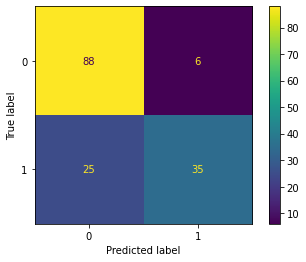

In [ ]:
plot_confusion_matrix(clf_2, X_test, y_test)

In [ ]:
## Predicted accuracy
clf_2.score(X_test, y_test) 

0.7987012987012987

#### **Model with StandardScaler() beforhand have the highest accurancy and predict label 1 with 50% accuracy**


## 2. KNeighbours

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(X)

X = pd.DataFrame(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

neigh_1 = KNeighborsClassifier(n_neighbors=3)
neigh_1.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


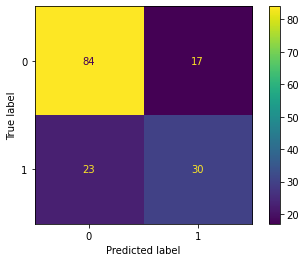

In [ ]:
plot_confusion_matrix(neigh_1, X_test, y_test)

In [ ]:
## Predicted accuracy
neigh_1.score(X_test, y_test)

0.7402597402597403

## KNeighbours with changed parameters

In [ ]:
neigh_kneighbours = KNeighborsClassifier(n_neighbors=5,leaf_size=100)
neigh_kneighbours.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=100)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


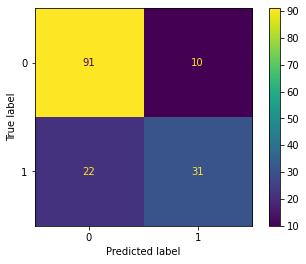

In [ ]:
plot_confusion_matrix(neigh_kneighbours, X_test, y_test)

In [ ]:
## Predicted accuracy
neigh_score = neigh_kneighbours.score(X_test, y_test) 
neigh_score

0.7922077922077922

## 3. SVC

In [ ]:
from sklearn.svm import SVC
clf_svc_1 = SVC()
clf_svc_1.fit(X_train,y_train)


SVC()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


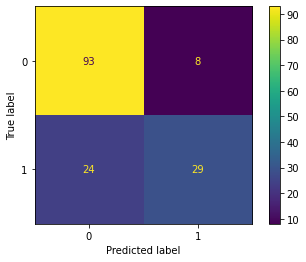

In [ ]:
plot_confusion_matrix(clf_svc_1, X_test, y_test)

In [ ]:
## Predicted accuracy
clf_svc_1.score(X_test, y_test) 

0.7922077922077922

## SVC with changed parameters

In [ ]:
clf_svc = SVC(C=1.25, kernel="rbf", probability=True,random_state=42)
clf_svc.fit(X_train, y_train)

SVC(C=1.25, probability=True, random_state=42)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


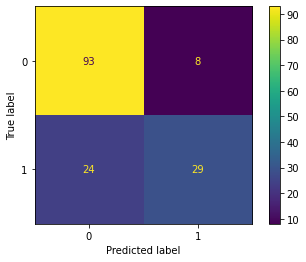

In [ ]:
plot_confusion_matrix(clf_svc, X_test, y_test)

In [ ]:
## Predicted accuracy
svc_score = clf_svc.score(X_test, y_test) 
svc_score

0.7922077922077922

#### **The higest accurancy with svc it can distungish between 1 and 0 label**

## 4. SGD classifier


In [ ]:
from sklearn.linear_model import SGDClassifier

clf_sgd = SGDClassifier()
clf_sgd.fit(X_train, y_train)


SGDClassifier()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


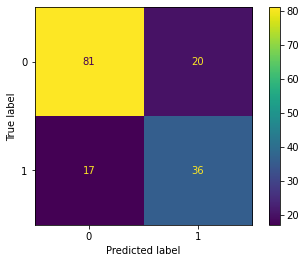

In [ ]:
plot_confusion_matrix(clf_sgd, X_test, y_test)

In [ ]:
## Predicted accuracy
score_sgd = clf_sgd.score(X_test, y_test) 
score_sgd

0.7597402597402597

### **Standard SGDClassifier have accuracy around 76%, so we will try to work with it parameters to increase that value**

## 4. SGD classifier with changed parameters


In [ ]:
clf_sgd_best = SGDClassifier(loss="hinge",
                             penalty="l1",
                             alpha=5*1e-4,
                             fit_intercept=True,
                             max_iter = 1e3,
                             tol = 1e-4,
                             shuffle=True,
                             eta0 =5,
                             class_weight = None,
                             random_state=0)
clf_sgd_best.fit(X_train,y_train)

SGDClassifier(alpha=0.0005, eta0=5, max_iter=1000.0, penalty='l1',
              random_state=0, tol=0.0001)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


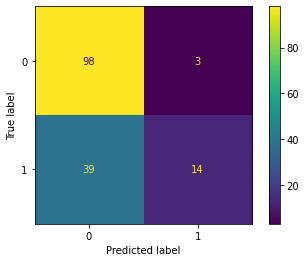

In [ ]:
plot_confusion_matrix(clf_sgd_best, X_test, y_test)

In [ ]:
## Predicted accuracy
clf_sgd_best.score(X_test, y_test)

0.7272727272727273

## 5. DeepLearning

In [ ]:
def plot_history(history):
  '''
  Takes history of our model and plot accuracy and loss function

  parms:
  history - model history

  output:
  -
  '''
  loss = history.history["loss"]
  acc = history.history["accuracy"]
  number_of_elements = len(loss)
  epochs = np.linspace(1,number_of_elements,number_of_elements)

  ## Plotting functions
  fig,ax = plt.subplots(2,1, figsize=(10,7))
  ax[0].plot(epochs, acc)
  ax[0].set_title("Accuracy")  
  ax[1].plot(epochs, loss)
  ax[1].set_title("Loss function")
  plt.show()


In [ ]:
import tensorflow as tf

tf.random.set_seed(42)
X_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"])

history_1 = model_1.fit(X_train,
                        y_train,
                        epochs=100,
                        verbose=0)

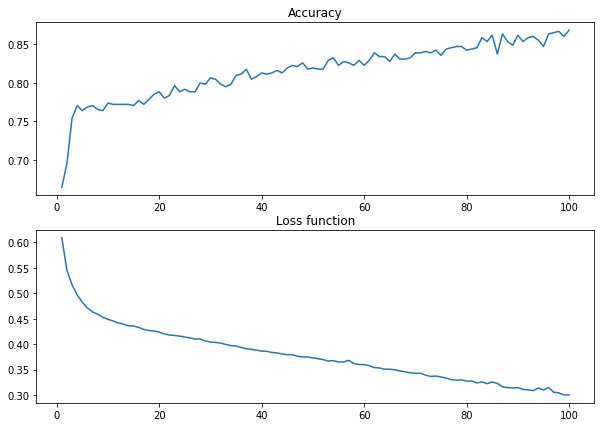

In [ ]:
plot_history(history_1)

In [ ]:
model_acc_1 = model_1.evaluate(X_test, y_test)[1]
model_acc_1

5/5 [==============================] - 0s 4ms/step - loss: 0.4995 - accuracy: 0.7532


0.7532467246055603

### **Simple ML model with one hidden unit have 75% accuracy on test data**

## Deeplearning with changed parameters

In [ ]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4* 10**(epoch/100))
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"])

history_2 = model_2.fit(X_train,
                        y_train,
                        epochs=500,
                        callbacks=[lr_schedule],
                        verbose=0)

Text(0, 0.5, 'Loss')

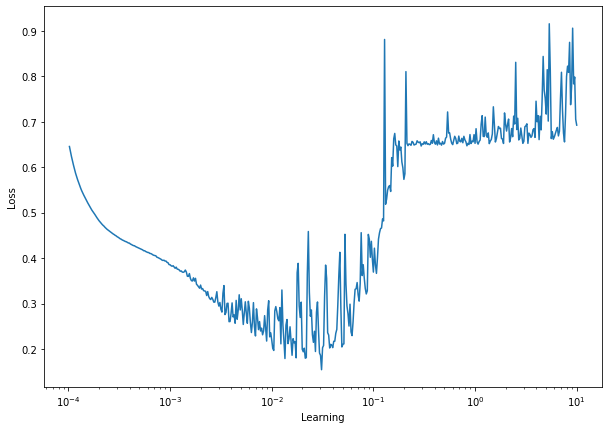

In [ ]:
lrs = [1e-4* 10**(epoch/100) for epoch in range(1,501)]
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_2.history["loss"])
plt.xlabel("Learning")
plt.ylabel("Loss")

Estimated lr will be equal to 1e-2

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=1e-2),
    metrics=["accuracy"])

history_3 = model_3.fit(X_train,
                        y_train,
                        epochs=100,
                        verbose=0)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


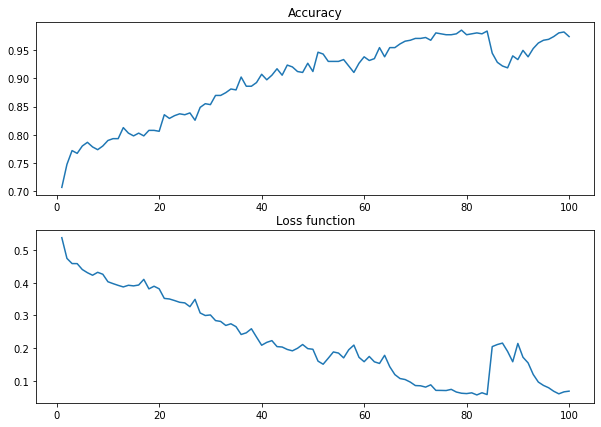

In [ ]:
plot_history(history_3)

In [ ]:
model_acc_3 = model_3.evaluate(X_test, y_test)[1]
model_acc_3

5/5 [==============================] - 0s 3ms/step - loss: 1.5817 - accuracy: 0.7662


0.7662337422370911

#### Model overfit to much 


### Trying to reduce overfitting with reduction of epochs

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=1e-2),
    metrics=["accuracy"])

history_4 = model_4.fit(X_train,
                        y_train,
                        epochs=20,
                        verbose=0)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


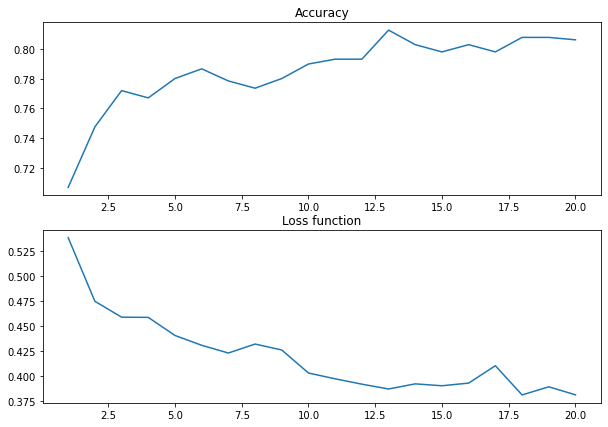

In [ ]:
plot_history(history_4)

In [ ]:
model_acc_4 = model_4.evaluate(X_test, y_test)[1]
model_acc_4 

5/5 [==============================] - 0s 4ms/step - loss: 0.4619 - accuracy: 0.8052


0.8051947951316833

#### With reducing number of epochs to 20 model dont overfit and overcome 80+ % accuracy

### Try to reduce Overfitting by adding dropout layer before first hidden unit

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=1e-2),
    metrics=["accuracy"])

history_5 = model_5.fit(X_train,
                        y_train,
                        epochs=100,
                        verbose=0)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


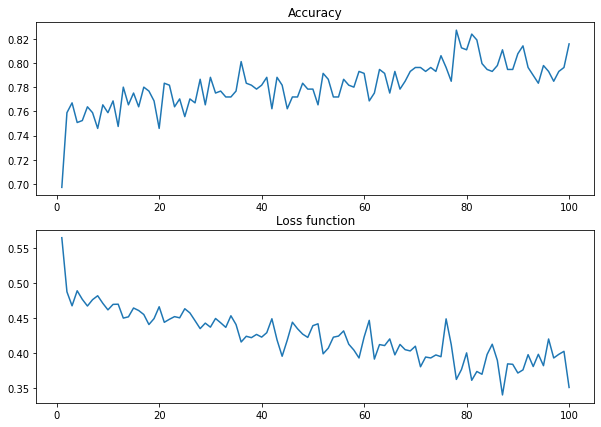

In [ ]:
plot_history(history_5)

In [ ]:
model_acc_5 = model_5.evaluate(X_test, y_test)[1]
model_acc_5

5/5 [==============================] - 0s 6ms/step - loss: 0.5644 - accuracy: 0.7662


0.7662337422370911

### With Dropout layer we couldn't increase our accuracy

## Calculating the time to check data

In [ ]:
import time
def pred_timer(model, samples):
  start_time = time.perf_counter()
  model.predict(samples)
  end_time = time.perf_counter()
  total_time = end_time - start_time
  time_per_pred = total_time/len(samples)
  return total_time, time_per_pred


In [ ]:
time_linsvc_total, time_linsvc_pp = pred_timer(clf_1,X_test)
time_kn_total, time_kn_pp = pred_timer(neigh_kneighbours,X_test)
time_svc_total, time_svc_pp = pred_timer(clf_svc,X_test)
time_sgd_total, time_sgd_pp = pred_timer(clf_sgd,X_test)
time_dp_total, time_dp_pp = pred_timer(model_4,X_test)

5/5 [==============================] - 0s 2ms/step


## Summary

In [ ]:
data = {"Linear_SVC": [round(100*clf_svc_classic_2,2),time_linsvc_total, time_linsvc_pp],
        "KNeighbours": [round(100*neigh_score,2),time_kn_total, time_kn_pp],
        "SVC": [round(100*svc_score,2),time_svc_total, time_svc_pp],
        "SGD": [round(100*score_sgd,2),time_sgd_total, time_sgd_pp],
        "DeepLearning": [round(100*model_acc_4,2),time_dp_total, time_dp_pp]}
tabel = pd.DataFrame(data=data, index=["Accuracy_value [%]", "Time_total_on_test_dataset","Time_per_data"])
tabel = tabel.T
tabel

,Accuracy_value [%],Time_total_on_test_dataset,Time_per_data
Linear_SVC,79.87,0.001950,0.000013
KNeighbours,79.22,0.010218,0.000066
SVC,79.22,0.006797,0.000044
SGD,75.97,0.001367,0.000009
DeepLearning,80.52,0.163498,0.001062


### LinearSVC have the best accuracy compare to it time to evaluate label for our data, it's the fastest and accuracy model